<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/Possible_tasks_from_medium_posts_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLANATORY DATA ANALYSIS

In [20]:
#  Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the Data
df = pd.read_csv('/content/medium_posts.csv')

In [22]:
#  Inspect the Data
print("Head:")
print(df.head())

Head:
                  published           domain  \
0  2012-08-13 22:54:53.510Z       medium.com   
1  2012-08-13 22:57:17.248Z       medium.com   
2  2016-11-04 23:40:43.364Z       medium.com   
3  2016-12-24 18:21:13.427Z       medium.com   
4  2015-09-22 21:37:48.207Z  blog.medium.com   

                                                 url  
0  https://medium.com/policy/medium-terms-of-serv...  
1  https://medium.com/policy/medium-privacy-polic...  
2  https://medium.com/@Medium/personalize-your-me...  
3  https://medium.com/holiday-poems/xmas-morning-...  
4  https://blog.medium.com/taking-a-side-on-net-n...  


In [23]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92191 entries, 0 to 92190
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   published  92191 non-null  object
 1   domain     92191 non-null  object
 2   url        92191 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB
None


In [24]:
print("\nDescription:")
print(df.describe())


Description:
                       published      domain                      url
count                      92191       92191                    92191
unique                     92063         143                    92144
top     2016-03-21 00:00:00.000Z  medium.com  https://medium.com/iiot
freq                           5       90186                       25


In [25]:
# Additional Exploration
# Count the number of articles per domain
domain_counts = df['domain'].value_counts()

In [26]:
print("\nNumber of Articles per Domain:")
print(domain_counts)


Number of Articles per Domain:
medium.com              90186
hackernoon.com           1406
themission.co             135
blog.medium.com            82
thecoffeelicious.com       33
                        ...  
the-ipad-artist.com         1
curiouscivilian.com         1
blog.framer.com             1
chatbotnewsdaily.com        1
theascent.biz               1
Name: domain, Length: 143, dtype: int64


In [27]:
# Display the top 10 most frequent domains
top_10_domains = domain_counts.head(10)

In [28]:
print("\nTop 10 Most Frequent Domains:")
print(top_10_domains)


Top 10 Most Frequent Domains:
medium.com                90186
hackernoon.com             1406
themission.co               135
blog.medium.com              82
thecoffeelicious.com         33
byrslf.co                    27
praxis.fortelabs.co          16
artplusmarketing.com         15
acumenideas.com              11
writingcooperative.com       10
Name: domain, dtype: int64


In [29]:
#  Check for Missing Values
missing_values = df.isnull().sum()

In [30]:
print("\nMissing Values:")
print(missing_values)


Missing Values:
published    0
domain       0
url          0
dtype: int64


In [31]:
# Handle Missing Values
# N/A

In [32]:
#  Check for Duplicate Values
print("\nDuplicate Values:")
print(df.duplicated().sum())


Duplicate Values:
10


In [33]:
#  Remove Duplicate Values
df.drop_duplicates(inplace=True)

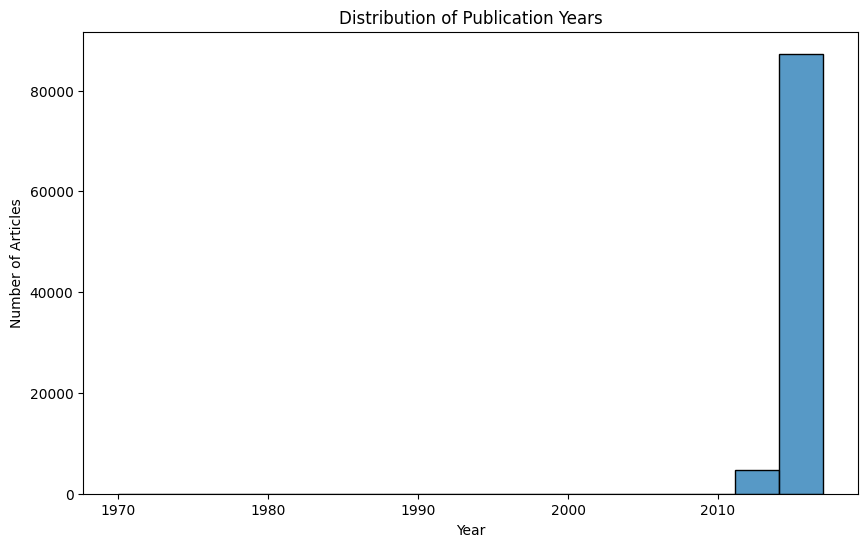

In [34]:
# Visualize the distribution of publication dates
df['published'] = pd.to_datetime(df['published'])  # Convert 'published' column to datetime
plt.figure(figsize=(10, 6))
sns.histplot(df['published'].dt.year, bins=len(df['published'].dt.year.unique()), kde=False)
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Publication Years')
plt.show()

# POSSIBLE TASKS FROM THE DATASET

# ANALYZE ARTICLE PUBLISHING TRENDS OVER TIME

<ipython-input-35-74e74fe117f4>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['published_month'] = df['published'].dt.to_period('M')


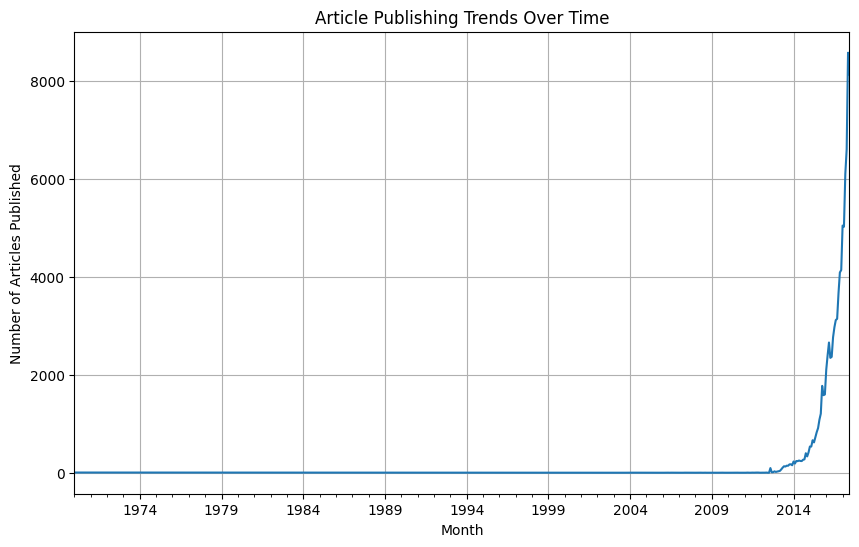

In [35]:
# Visualize article publishing trends over time
df['published'] = pd.to_datetime(df['published'])
df['published_month'] = df['published'].dt.to_period('M')
article_counts = df['published_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
article_counts.plot(kind='line')
plt.title('Article Publishing Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()

# ANALYZE ARTICLE PUBLISHING FREQUENCY BY DOMAIN

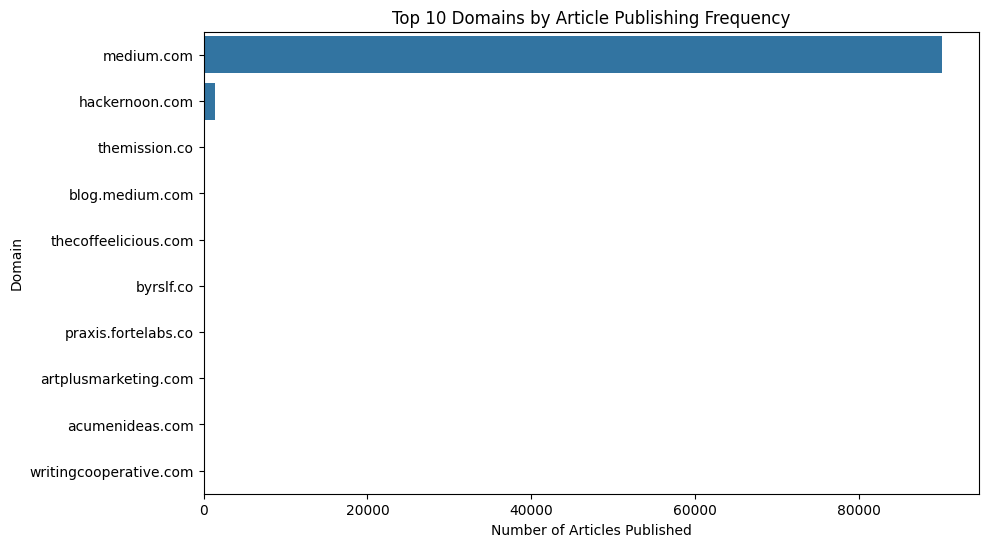

In [36]:
# Analyze article publishing frequency by domain
domain_counts = df['domain'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.values, y=domain_counts.index)
plt.title('Top 10 Domains by Article Publishing Frequency')
plt.xlabel('Number of Articles Published')
plt.ylabel('Domain')
plt.show()

# EXPLORE ARTICLE URL STRUCTURE

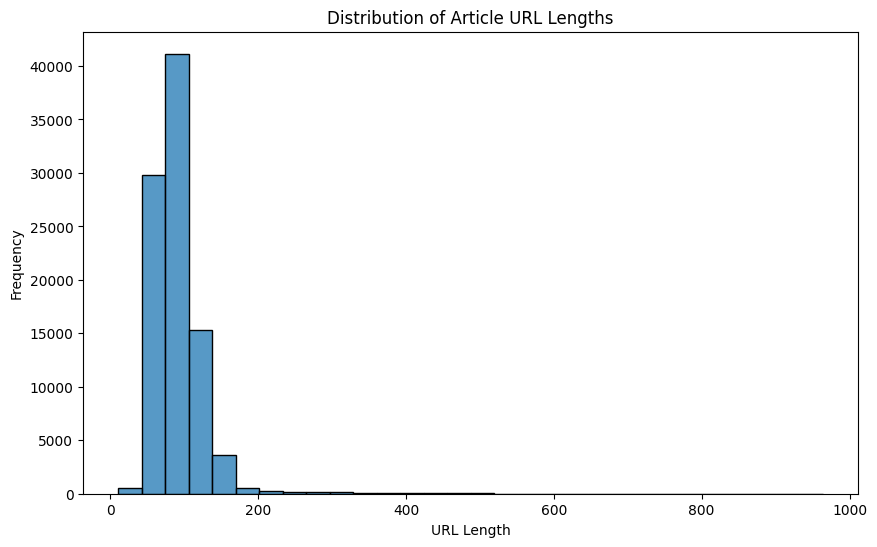

In [37]:
# Explore article URL structure
df['url_length'] = df['url'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.histplot(df['url_length'], bins=30)
plt.title('Distribution of Article URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()